In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
from math import log2
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_poisson_deviance
from sklearn.metrics import mean_gamma_deviance
from sklearn.metrics import median_absolute_error
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.pipeline import make_pipeline
import time
import matplotlib as mpl

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor



from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,QuantileTransformer,normalize
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from sklearn.feature_selection import VarianceThreshold, SelectKBest
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import pathlib
import os
import sys

# for selection the right path
import os,sys,inspect,pathlib
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common.model_trainer_reg import *

from GD.LinearRegression import LinearRegression
from KNN.KNNRegressor import KNNRegressor

In [2]:
# Custom functions

module_path = pathlib.Path(os.getcwd()).parent
if str(module_path) not in sys.path:
    sys.path.append(str(module_path))
print(sys.path)

from common.dataset_grabber import get_data_path

#https://joeganser.github.io/2019-01-26-superconductivity-regression/

['/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2', '/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Superconductivty', '', '/home/alexander/ngsuite/ngsolve-install/lib/python3/dist-packages', '/home/alexander/ngsuite/ngsolve-install/bin', '/home/alexander/.local/bin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles', '/home/alexander/.vscode/extensions/ms-toolsai.jupyter-2020.11.392013122/pythonFiles/lib/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/home/alexander/.local/lib/python3.7/site-packages', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-p

In [3]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    plt.grid()
    return plt

In [4]:
def plot_learning_curve_own(y,model,ylim = None):
    if ylim:
        plt.ylim(*ylim)
    plt.xlabel("number of splits")
    plt.ylabel("score")
    plt.grid()
    plt.plot(y,marker = "o",label="Training score"+model)
    plt.legend()

In [5]:
datapath = get_data_path("Superconduct", "train.csv")
display(datapath)

PosixPath('/home/alexander/Dokumente/WS2020/MaschinLearning/ML_2020/Ex2/Datasets/Superconduct/train.csv')

In [6]:
df_raw = pd.read_csv(datapath)

df_raw = df_raw.sample(3000)

In [7]:
corr_temp = df_raw.corr()
corr_temp = np.abs(corr_temp.critical_temp)

In [8]:
corr_temp

number_of_elements       0.605724
mean_atomic_mass         0.125829
wtd_mean_atomic_mass     0.322613
gmean_atomic_mass        0.244978
wtd_gmean_atomic_mass    0.380195
                           ...   
range_Valence            0.113720
wtd_range_Valence        0.445411
std_Valence              0.181002
wtd_std_Valence          0.291537
critical_temp            1.000000
Name: critical_temp, Length: 82, dtype: float64

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 3627 to 16349
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               3000 non-null   int64  
 1   mean_atomic_mass                 3000 non-null   float64
 2   wtd_mean_atomic_mass             3000 non-null   float64
 3   gmean_atomic_mass                3000 non-null   float64
 4   wtd_gmean_atomic_mass            3000 non-null   float64
 5   entropy_atomic_mass              3000 non-null   float64
 6   wtd_entropy_atomic_mass          3000 non-null   float64
 7   range_atomic_mass                3000 non-null   float64
 8   wtd_range_atomic_mass            3000 non-null   float64
 9   std_atomic_mass                  3000 non-null   float64
 10  wtd_std_atomic_mass              3000 non-null   float64
 11  mean_fie                         3000 non-null   float64
 12  wtd_mean_fie    

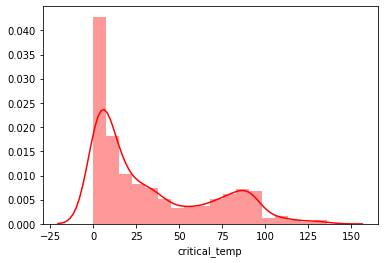

In [10]:
np.mean(df_raw["critical_temp"])
sns.distplot(df_raw["critical_temp"], color="red")

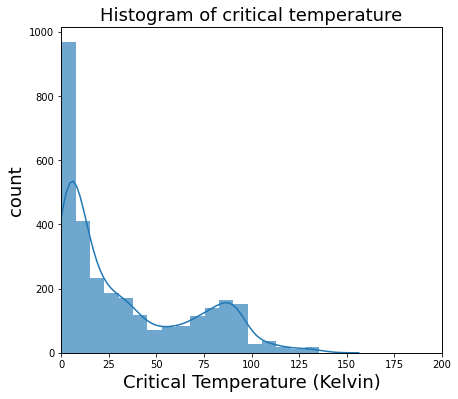

In [11]:
y = df_raw['critical_temp']
e=0.1515151515151516
y_mean = y.apply(lambda x: (x**e)).mean()
plt.figure(figsize=(15,6))
#plt.figure()
plt.subplot(1,2,1)
plt.title('Histogram of critical temperature',fontsize=18)
ax1 = sns.distplot(y, kde=False)
# Creating another Y axis
second_ax1 = ax1.twinx()
#Plotting kde without hist on the second Y axis
sns.distplot(y, ax=second_ax1, kde=True, hist=True)
#Removing Y ticks from the second axis
second_ax1.set_yticks([])
ax1.set_ylabel('count',fontsize=18)
ax1.set_xlabel('Critical Temperature (Kelvin)',fontsize=18)
plt.xlim(0,200)
plt.savefig("out/prep/temp_dist_raw.png")

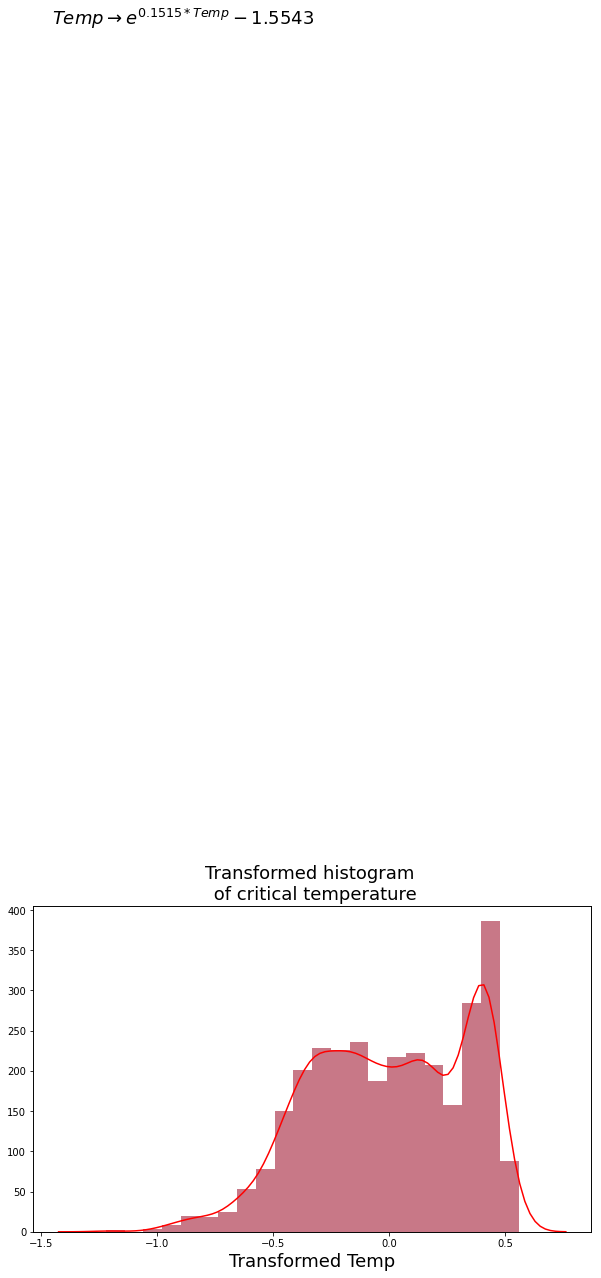

In [12]:
plt.figure(figsize=(10,6))
plt.title('Transformed histogram \n of critical temperature',fontsize=18)
transform_text = r'$Temp\rightarrow e^{0.1515*Temp}-1.5543$'
transformed = y.apply(lambda x: (x**e)-y_mean)
ax2 = sns.distplot(transformed, kde=False)
# Creating another Y axis
second_ax2 = ax2.twinx()
#Plotting kde without hist on the second Y axis
sns.distplot(transformed, ax=second_ax2, kde=True, hist=True,color='red')
#Removing Y ticks from the second axis
second_ax2.set_yticks([])
ax2.text(-1.45,1500,transform_text,fontsize=18)
ax2.set_xlabel('Transformed Temp',fontsize=18)
plt.subplots_adjust(wspace=0.2)
plt.savefig("out/prep/temp_dist_transform")
plt.show()

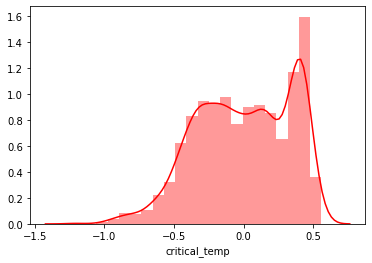

In [13]:
sns.distplot(transformed, color="red")